In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import det_curve
from mpl_toolkits import mplot3d
from sklearn.metrics import DetCurveDisplay

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dev = "/content/drive/My Drive/Colab Notebooks/dev2.txt"
train = "/content/drive/My Drive/Colab Notebooks/trian2.txt"

In [ ]:
#first considering the linearly separable data
file1= open(train)
train1=np.array([[float(lines.split(',')[0]),float(lines.split(',')[1]),int(lines.split(',')[2])] for lines in file1.readlines()],dtype=np.float64)
train_tb = pd.DataFrame(train1,columns=['x','y','class'])

file2 = open(dev)
dev1=np.array([[float(lines.split(',')[0]),float(lines.split(',')[1]),int(lines.split(',')[2])] for lines in file2.readlines()],dtype=np.float64)
dev_tb = pd.DataFrame(dev1,columns=['x','y','class'])


In [ ]:
prior=np.zeros((3))
prior[0]=np.count_nonzero(train_tb['class']==1)/len(train_tb)
prior[1]=np.count_nonzero(train_tb['class']==2)/len(train_tb)
prior[2]=np.count_nonzero(train_tb['class']==3)/len(train_tb)

In [ ]:
def gaussian_2d(mean,cov,x):
  return ((2*np.pi*np.sqrt(np.linalg.det(cov)))**(-1))*np.exp(-0.5*np.inner((x-mean),np.matmul(np.linalg.pinv(cov),(x-mean))))

def predictor(mean,cov,x):
  a=np.zeros(3)
  for i in range(3):
    a[i] = gaussian_2d(mean[i],cov[i],x)*prior[i]
  return np.argmax(a)+1

In [ ]:

class1 = train_tb.loc[train_tb['class']==1]
class2 = train_tb.loc[train_tb['class']==2]
class3 = train_tb.loc[train_tb['class']==3]

mean = np.zeros((3,2))
mean[0][0] = class1['x'].mean()
mean[0][1] = class1['y'].mean()
mean[1][0] = class2['x'].mean()
mean[1][1] = class2['y'].mean()
mean[2][0] = class3['x'].mean()
mean[2][1] = class3['y'].mean()


In [ ]:
def gaussian_2d_plt(mean,cov,params,mnum):
  def gaussian(mean,cov,x,y):
    x=x-mean[0]
    y=y-mean[1]
    c=np.linalg.pinv(cov)
    return ((2*np.pi*np.sqrt(np.linalg.det(cov)))**(-1))*np.exp(-0.5*(c[0,0]*(x**2)+(c[1,0]+c[0,1])*x*y+c[1,1]*(y**2)))
  from mpl_toolkits import mplot3d
  fig = plt.figure(figsize=(15,9))
  ax = plt.axes(projection='3d')
  x=np.linspace(params[0][0],params[0][1],100)
  y=np.linspace(params[1][0],params[1][1],100)
  X,Y=np.meshgrid(x,y)
  Z1=gaussian(mean[0],cov[0],X,Y)
  Z2=gaussian(mean[1],cov[1],X,Y)
  Z3=gaussian(mean[2],cov[2],X,Y)
  ax.contour3D(X, Y, Z1, 50, cmap='binary')
  ax.contour3D(X, Y, Z2, 50, cmap='binary')
  ax.contour3D(X, Y, Z3, 50, cmap='binary')
  ax.view_init(40,30)
  plt.title("PDF for model-"+str(mnum))

def decision_boundary(mean,cov,params,mnum):
  #x = np.arange(params[0][0],params[0][1],0.2)
  #y = np.arange(params[1][0],params[1][1],0.2)
  x=np.linspace(params[0][0],params[0][1],100)
  y=np.linspace(params[1][0],params[1][1],100)
  Z = np.zeros(x.shape[0]*y.shape[0])
  X,Y = np.meshgrid(x,y)
  data_points = np.c_[X.ravel(),Y.ravel()]
  for i,p in enumerate(data_points):
    Z[i] = int(predictor(mean,cov,p))
  Z = np.reshape(Z,X.shape)
  plt.figure()
  plt.title('Decision boundary of the model-'+str(mnum))
  plt.contourf(X,Y,Z)
  plt.scatter(class1[['x','y']].values[:,0], class1[['x','y']].values[:,1], marker='^',facecolors='none', edgecolors='r', label='Class 1')#
  plt.scatter(class2[['x','y']].values[:,0], class2[['x','y']].values[:,1], marker='o',facecolors='none', edgecolors='g', label='Class 2')
  plt.scatter(class3[['x','y']].values[:,0], class3[['x','y']].values[:,1], marker='s',facecolors='none', edgecolors='b', label='Class 3')
  plt.legend()

def density_curve(mean,cov,params,mnum):
  def gaussian(mean,cov,x,y):
    x=x-mean[0]
    y=y-mean[1]
    c=np.linalg.pinv(cov)
    return ((2*np.pi*np.sqrt(np.linalg.det(cov)))**(-1))*np.exp(-0.5*(c[0,0]*(x**2)+(c[1,0]+c[0,1])*x*y+c[1,1]*(y**2)))
  x=np.linspace(params[0][0],params[0][1],1000)
  y=np.linspace(params[1][0],params[1][1],1000)
  X, Y = np.meshgrid(x,y)
  plt.figure()
  plt.contour(X, Y, gaussian(mean[0], cov[0],X,Y),colors='r')
  plt.contour(X, Y, gaussian(mean[1], cov[1],X,Y),colors='g')
  plt.contour(X, Y, gaussian(mean[2], cov[2],X,Y),colors='b')
  plt.grid()
  plt.title('density curves and eigenvectors for model-'+str(mnum))
  plt.quiver(*mean[0],*np.linalg.eig(cov[0])[1][:,0],color=['r'],scale=8)
  plt.quiver(*mean[0],*np.linalg.eig(cov[0])[1][:,1],color=['b'],scale=8)
  plt.quiver(*mean[1],*np.linalg.eig(cov[1])[1][:,0],color=['r'],scale=8)
  plt.quiver(*mean[1],*np.linalg.eig(cov[1])[1][:,1],color=['b'],scale=8)
  plt.quiver(*mean[2],*np.linalg.eig(cov[2])[1][:,0],color=['r'],scale=8)
  plt.quiver(*mean[2],*np.linalg.eig(cov[2])[1][:,1],color=['b'],scale=8)  


In [ ]:
a=[[2,3],[5,7]]
np.amax(a)

7

In [ ]:
def ROC(mean,cov,groundtruth=dev_tb[['class']].values):
  #S = np.zeros((len(dev_tb),3))
  #for i in range(len(dev_tb)):
  #  for j in range(3):
  S= [[gaussian_2d(mean[j],cov[j],dev_tb[['x','y']].values[i])*prior[j] for j in range(3)] for i in range(len(dev_tb))]

  thresh = np.linspace(np.amin(S),np.amax(S),200)
  TPR=[]
  FPR=[]
  FNR=[]
  for t in thresh:
    tp=0
    fp=0
    tn=0
    fn=0

    for i in range(len(dev_tb)):
      for j in range(3):
        if S[i][j]>=t:
          if groundtruth[i] == j+1:
            tp+=1
          else:
            fp+=1
        else:
          if groundtruth[i] == j+1:
            fn+=1
          else:
            tn+=1

    TPR.append(tp/(tp+fn))
    FPR.append(fp/(fp+tn))
    FNR.append(fn/(tp+fn))

  return FPR,TPR,FNR
  


In [ ]:
#x_limits=(-10,20)
#y_limits=(-15,15)

#x_limits=(15,60)
#y_limits=(15,60)

x_limits=(0,1500)
y_limits=(0,2600)

params=[x_limits,y_limits]

In [ ]:
def conf_table(mean,cov,prt=True):
  predicted_train=np.zeros(len(train_tb))
  i=0
  for p in train_tb[['x','y']].values:
    predicted_train[i]=predictor(mean,cov,p)
    i+=1

  #print(np.count_nonzero(predicted_train==train_tb['class']))

  predicted_dev=np.zeros(len(dev_tb))
  i=0
  for p in dev_tb[['x','y']].values:
    predicted_dev[i]=predictor(mean,cov,p)
    i+=1

  if prt:
    #print(np.count_nonzero(predicted_dev==dev_tb['class']))
    cfm = confusion_matrix(dev_tb['class'],predicted_dev)
    print(cfm)
    print('Accuracy = '+str((np.array(cfm)[0,0]+np.array(cfm)[1,1]+np.array(cfm)[2,2])/3))

  return predicted_train,predicted_dev

[[83  0 17]
 [ 0 92  8]
 [ 6  7 87]]
Accuracy = 87.33333333333333


/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


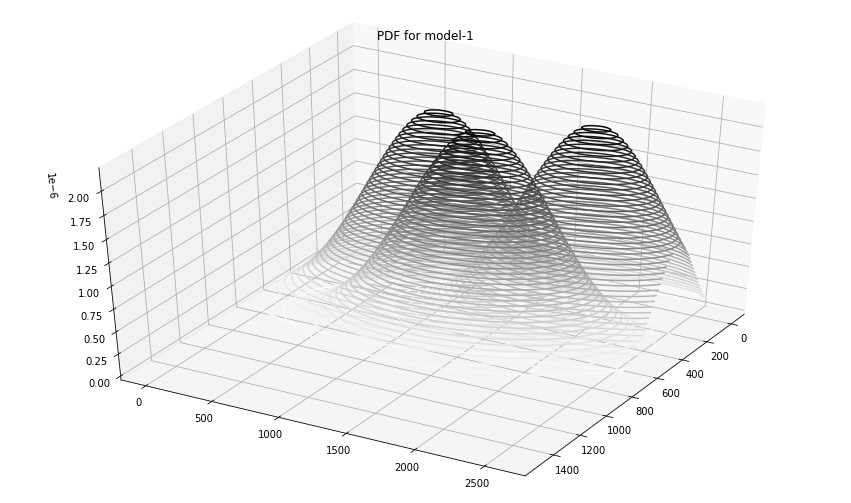

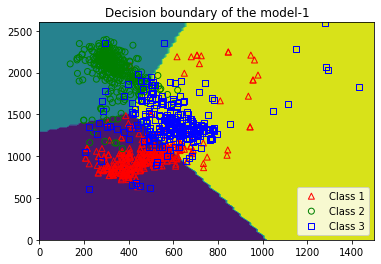

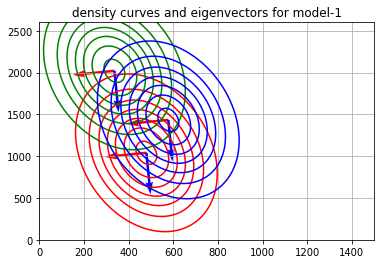

In [ ]:
#model-1 Bayes with covariance same for all classes
#Estimating the covariance matrix
'''
cov1=np.zeros((2,2))
for i  in class1[['x','y']].values:
  cov1 += np.outer(i,i)

cov1 = cov1/len(class1)-np.outer(mean[0],mean[0])

cov2=np.zeros((2,2))
for i  in class2[['x','y']].values:
  cov2 += np.outer(i,i)

cov2 = cov2/len(class2)-np.outer(mean[1],mean[1])

cov3=np.zeros((2,2))
for i  in class3[['x','y']].values:
  cov3 += np.outer(i,i)

cov3 = cov3/len(class3)-np.outer(mean[2],mean[2])

cov_m1 = [(cov1+cov2+cov3)/3,(cov1+cov2+cov3)/3,(cov1+cov2+cov3)/3]
'''

arr = np.vstack((class1[['x','y']].values,class2[['x','y']].values,class3[['x','y']].values))

cov=np.zeros((2,2))
for i in arr:
  cov += np.outer(i,i)


cov = cov/len(arr)-np.outer((mean[0]+mean[1]+mean[2])/3,(mean[0]+mean[1]+mean[2])/3)

cov_m1=[cov,cov,cov]


conf_table(mean,cov_m1)

gaussian_2d_plt(mean,cov_m1,params,1)
decision_boundary(mean,cov_m1,params,1)
density_curve(mean,cov_m1,params,1)


[[89  0 11]
 [ 0 94  6]
 [ 7  5 88]]


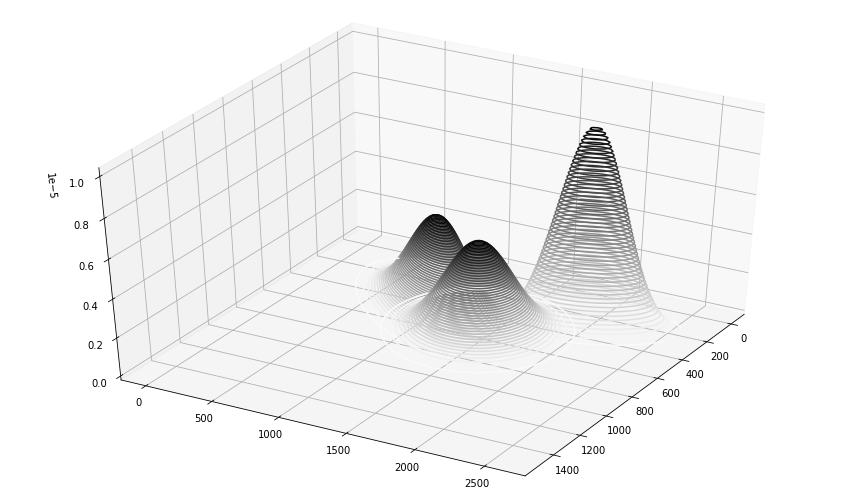

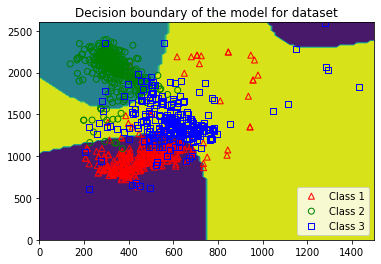

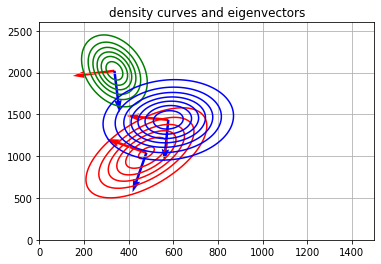

In [ ]:
#model-2 Bayes with covariance different for different classes
#Estimating the covariance matrix
cov1=np.zeros((2,2))
for i  in class1[['x','y']].values:
  cov1 += np.outer(i,i)

cov1 = cov1/len(class1)-np.outer(mean[0],mean[0])

cov2=np.zeros((2,2))
for i  in class2[['x','y']].values:
  cov2 += np.outer(i,i)

cov2 = cov2/len(class2)-np.outer(mean[1],mean[1])

cov3=np.zeros((2,2))
for i  in class3[['x','y']].values:
  cov3 += np.outer(i,i)

cov3 = cov3/len(class3)-np.outer(mean[2],mean[2])

cov_m2 = [cov1,cov2,cov3]
conf_table(mean,cov_m2)
'''
predicted_train=np.zeros(len(train_tb))
i=0
for p in train_tb[['x','y']].values:
  predicted_train[i]=predictor(mean,cov,p)
  i+=1

print(np.count_nonzero(predicted_train==train_tb['class']))

predicted_dev=np.zeros(len(dev_tb))
i=0
for p in dev_tb[['x','y']].values:
  predicted_dev[i]=predictor(mean,cov,p)
  i+=1

print(np.count_nonzero(predicted_dev==dev_tb['class']))
print(confusion_matrix(dev_tb['class'],predicted_dev))
'''

gaussian_2d_plt(mean,cov_m2,params,2)
decision_boundary(mean,cov_m2,params,2)
density_curve(mean,cov_m2,params,2)

[[91  3  6]
 [ 0 97  3]
 [ 7  7 86]]


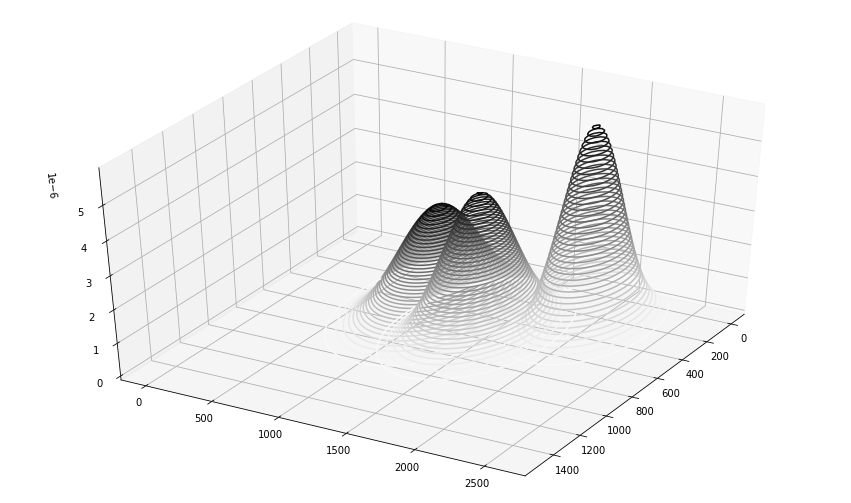

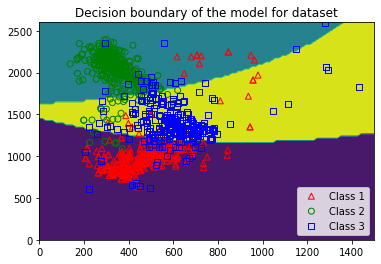

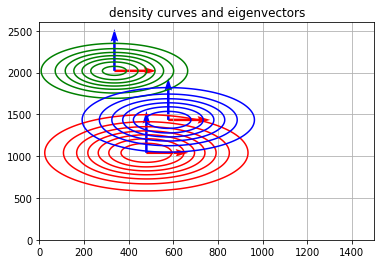

In [ ]:
#model-3 Naive Bayes with covariance C=\sigma^2I
#sigma=(class1['x'].var()+class1['y'].var()+class2['x'].var()+class2['y'].var()+class3['x'].var()+class3['y'].var())/6
#cov = [np.diag([sigma,sigma]),np.diag([sigma,sigma]),np.diag([sigma,sigma])]

sigma1= (class1['x'].var()+class1['y'].var())/2
sigma2= (class2['x'].var()+class2['y'].var())/2
sigma3= (class3['x'].var()+class3['y'].var())/2
cov_m3 = [np.diag([sigma1,sigma1]),np.diag([sigma2,sigma2]),np.diag([sigma3,sigma3])]


conf_table(mean,cov_m3)

'''
predicted_train=np.zeros(len(train_tb))
i=0
for p in train_tb[['x','y']].values:
  predicted_train[i]=predictor(mean,cov,p)
  i+=1

print(np.count_nonzero(predicted_train==train_tb['class']))

predicted_dev=np.zeros(len(dev_tb))
i=0
for p in dev_tb[['x','y']].values:
  predicted_dev[i]=predictor(mean,cov,p)
  i+=1

print(np.count_nonzero(predicted_dev==dev_tb['class']))
print(confusion_matrix(dev_tb['class'],predicted_dev))
'''

gaussian_2d_plt(mean,cov_m3,params,3)
decision_boundary(mean,cov_m3,params,3)
density_curve(mean,cov_m3,params,3)

[[82  1 17]
 [ 0 92  8]
 [ 5  8 87]]


/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


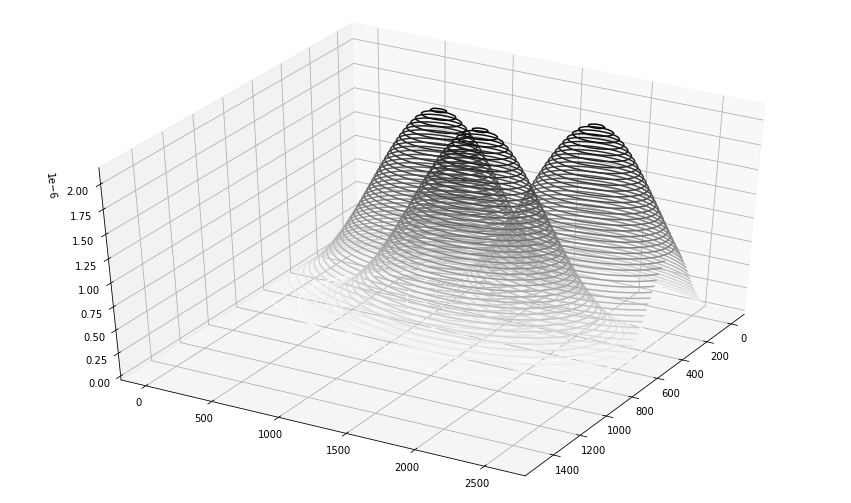

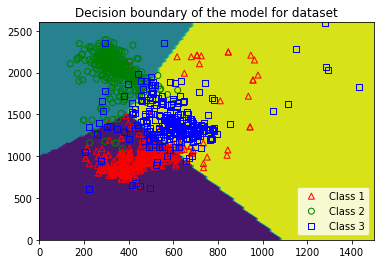

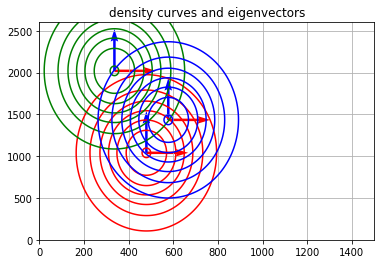

In [ ]:
#model-4 Naive bayes with same covariance
'''
sigma1 = (class1['x'].var()+class2['x'].var()+class3['x'].var())/3
sigma2 = (class1['y'].var()+class2['y'].var()+class3['y'].var())/3
cov_m4 = [np.diag([sigma1,sigma2]),np.diag([sigma1,sigma2]),np.diag([sigma1,sigma2])]
'''
sigma1 = np.hstack((class1['x'].values,class2['x'].values,class3['x'].values)).var()
sigma2 = np.hstack((class1['y'].values,class2['y'].values,class3['y'].values)).var()

cov_m4 = [np.diag([sigma1,sigma2]),np.diag([sigma1,sigma2]),np.diag([sigma1,sigma2])]

conf_table(mean,cov_m4)

'''
predicted_train=np.zeros(len(train_tb))
i=0
for p in train_tb[['x','y']].values:
  predicted_train[i]=predictor(mean,cov,p)
  i+=1

print(np.count_nonzero(predicted_train==train_tb['class']))

predicted_dev=np.zeros(len(dev_tb))
i=0
for p in dev_tb[['x','y']].values:
  predicted_dev[i]=predictor(mean,cov,p)
  i+=1

print(np.count_nonzero(predicted_dev==dev_tb['class']))
print(confusion_matrix(dev_tb['class'],predicted_dev))
'''


gaussian_2d_plt(mean,cov_m4,params,4)
decision_boundary(mean,cov_m4,params,4)
density_curve(mean,cov_m4,params,4)

[[89  0 11]
 [ 0 94  6]
 [ 7  4 89]]


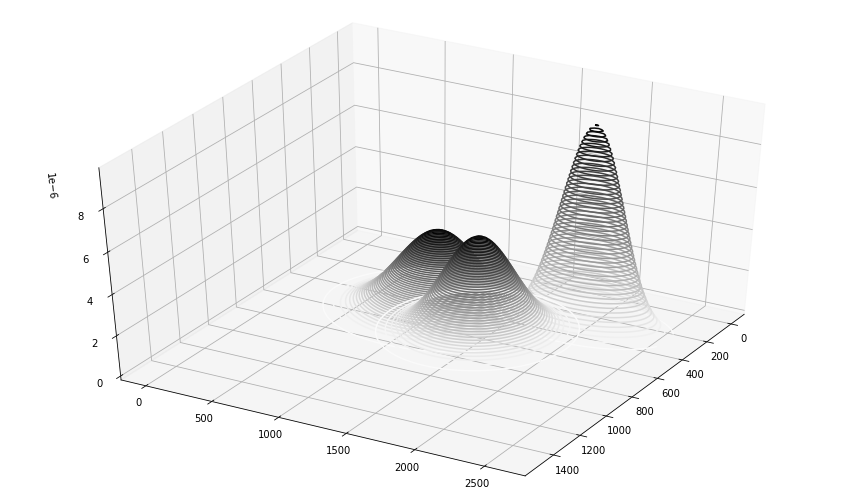

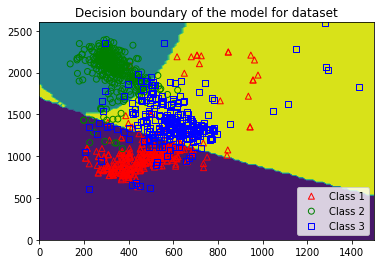

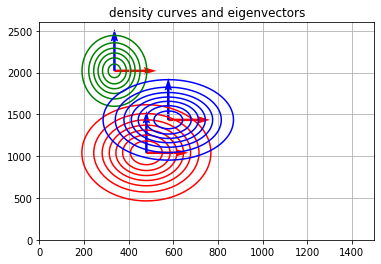

In [ ]:
#model-5 Naive bayes with different covariance
cov1=np.diag([class1['x'].var(),class1['y'].var()])
cov2=np.diag([class2['x'].var(),class2['y'].var()])
cov3=np.diag([class3['x'].var(),class3['y'].var()])
cov_m5=[cov1,cov2,cov3]

conf_table(mean,cov_m5)

'''
predicted_train=np.zeros(len(train_tb))
i=0
for p in train_tb[['x','y']].values:
  predicted_train[i]=predictor(mean,cov,p)
  i+=1

print(np.count_nonzero(predicted_train==train_tb['class']))

predicted_dev=np.zeros(len(dev_tb))
i=0
for p in dev_tb[['x','y']].values:
  predicted_dev[i]=predictor(mean,cov,p)
  i+=1

print(np.count_nonzero(predicted_dev==dev_tb['class']))
print(confusion_matrix(dev_tb['class'],predicted_dev))
'''

gaussian_2d_plt(mean,cov_m5,params,5)
decision_boundary(mean,cov_m5,params,5)
density_curve(mean,cov_m5,params,5)

Text(0.5, 1.0, 'DET-CURVE')

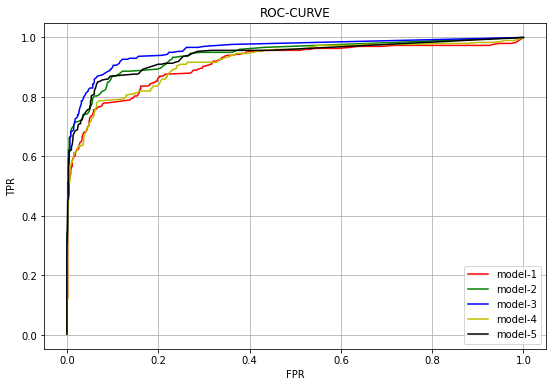

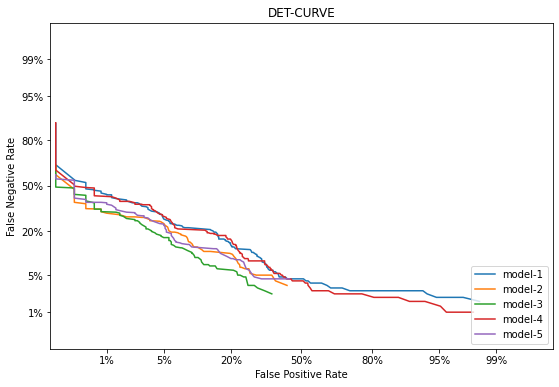

In [ ]:
m1,m2,m3,m4,m5 = ROC(mean,cov_m1),ROC(mean,cov_m2),ROC(mean,cov_m3),ROC(mean,cov_m4),ROC(mean,cov_m5)
plt.figure(figsize=(9,6))
plt.plot(m1[0],m1[1],color='r',label='model-1')
plt.plot(m2[0],m2[1],color='g',label='model-2')
plt.plot(m3[0],m3[1],color='b',label='model-3')
plt.plot(m4[0],m4[1],color='y',label='model-4')
plt.plot(m5[0],m5[1],color='k',label='model-5')
plt.legend()
plt.grid()
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title("ROC-CURVE")

fig = plt.figure(figsize=(9,6))
ax= fig.gca()
DetCurveDisplay(fpr=m1[0],fnr=m1[2],estimator_name='model-1').plot(ax)
DetCurveDisplay(fpr=m2[0],fnr=m2[2],estimator_name='model-2').plot(ax)
DetCurveDisplay(fpr=m3[0],fnr=m3[2],estimator_name='model-3').plot(ax)
DetCurveDisplay(fpr=m4[0],fnr=m4[2],estimator_name='model-4').plot(ax)
DetCurveDisplay(fpr=m5[0],fnr=m5[2],estimator_name='model-5').plot(ax)
plt.title("DET-CURVE")

In [ ]:
len(np.diagonal(gaussian_2d_plt(mean[0],cov[0],class1[['x','y']].values)))

350

In [ ]:
cov

[array([[1.1935354 , 0.        ],
        [0.        , 5.34202035]]), array([[7.16133877, 0.        ],
        [0.        , 0.89031626]]), array([[3.38490214, 0.        ],
        [0.        , 3.15070256]])]

In [ ]:
cov[0][1,0]

0.0

In [ ]:
a=np.array([[1,2],[3,4]])
b=np.array([[4,5],[5,6]])
np.vstack((a,b))

array([[1, 2],
       [3, 4],
       [4, 5],
       [5, 6]])

In [ ]:
c=np.array([1,2,3])
d=np.array([4,5,6])
np.hstack((c,d))
len(np.hstack((class1['x'].values,class1['y'].values)))
len(class1['x'].values)

350

In [ ]:
c.var()

0.6666666666666666